![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import plotly.express as px
import collections
from sklearn.preprocessing import StandardScaler

from datetime import datetime
from datetime import timedelta

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [3]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [5]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [7]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [8]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [9]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [10]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [12]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
28208,id_5486,Berlin,NaN,5488.0,NaN,15.0,"[['Slightly above average cafe', 'Nice cafe in...",/Restaurant_Review-g187323-d7047658-Reviews-Sc...,d7047658,1,3.5
1921,id_1921,Barcelona,"['Mediterranean', 'European', 'Spanish', 'Vege...",563.0,$$ - $$$,335.0,"[['Allways a good place to lunch!', 'Market, B...",/Restaurant_Review-g187497-d911374-Reviews-San...,d911374,0,0.0
30929,id_9890,London,['Indian'],9899.0,NaN,8.0,"[['Regular Friday night takeaway.', 'Friday ni...",/Restaurant_Review-g186338-d5502977-Reviews-In...,d5502977,1,4.5
29148,id_2969,Vienna,['Asian'],2971.0,NaN,2.0,"[[], []]",/Restaurant_Review-g190454-d3686952-Reviews-Sp...,d3686952,1,3.5
11946,id_39,Lisbon,"['Portuguese', 'Wine Bar', 'Vegetarian Friendly']",40.0,$$ - $$$,1298.0,"[['Always good wine', 'Family tapas'], ['02/24...",/Restaurant_Review-g189158-d1792131-Reviews-Wi...,d1792131,1,4.5


Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   


In [13]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

In [14]:
#rename columns
data.columns = data.columns.str.replace(' ', '')
data.columns

Index(['Restaurant_id', 'City', 'CuisineStyle', 'Ranking', 'PriceRange',
       'NumberofReviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating'],
      dtype='object')

## 1. EDA
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

### 1. Rating
At the beginning we will analyse the variable we want to** predcit

In [15]:
print('number of unique values in Rating', len(data.Rating.unique()))
print('list of unique values in Rating: ', data.Rating.unique()) 
print('number of non NaN is ', len(data.Rating))


number of unique values in Rating 10
list of unique values in Rating:  [0.  3.5 4.  4.5 5.  3.  2.5 2.  1.  1.5]
number of non NaN is  50000


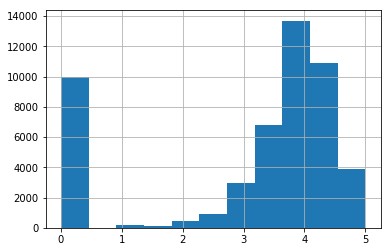

In [16]:
#check the distribution
data.Rating.hist(bins=11)

### 2. Restaurant_id

In [17]:
print(len(data.Restaurant_id.unique()))
print(data.Restaurant_id.isna().sum())

13094
0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5948caa048>]],
      dtype=object)

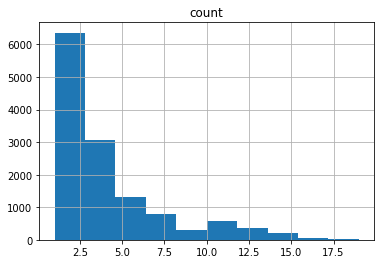

In [18]:
rest_gr = data.groupby('Restaurant_id')['Restaurant_id'].agg(['count']).sort_values(by = 'count', ascending=False).reset_index()
rest_gr.hist()

In [19]:
rest_gr[:10]

,Restaurant_id,count
0,id_227,19
1,id_871,19
2,id_436,19
3,id_633,19
4,id_534,18
5,id_321,18
6,id_585,18
7,id_430,18
8,id_344,18
9,id_71,18


In [20]:
data[data['Restaurant_id']=='id_534'].head()

,Restaurant_id,City,CuisineStyle,Ranking,PriceRange,NumberofReviews,Reviews,URL_TA,ID_TA,sample,Rating
534,id_534,Lyon,"['Pakistani', 'Indian', 'Vegetarian Friendly']",795.0,$$ - $$$,84.0,"[['Great Indian resturant!', 'Nice Indian plac...",/Restaurant_Review-g187265-d816667-Reviews-New...,d816667,0,0.0
11771,id_534,Luxembourg,"['Italian', 'French']",535.0,NaN,7.0,[['Excellent fresh pasta and friendly service'...,/Restaurant_Review-g190356-d4884737-Reviews-Re...,d4884737,1,3.5
11847,id_534,Paris,"['French', 'Bar', 'European', 'Vegetarian Frie...",535.0,$$ - $$$,333.0,[['Nice and friendly brasserie along the cana....,/Restaurant_Review-g187147-d783786-Reviews-Le_...,d783786,1,4.0
16090,id_534,Barcelona,"['Mediterranean', 'European', 'Spanish', 'Vege...",535.0,$,422.0,"[['Lovely find', 'Good choice for lunch in Bar...",/Restaurant_Review-g187497-d717389-Reviews-Res...,d717389,1,4.0
17756,id_534,Amsterdam,"['American', 'Fast Food']",535.0,$,240.0,"[['Tailored burger', 'Many ingredients'], ['12...",/Restaurant_Review-g188590-d8537685-Reviews-Bu...,d8537685,1,4.0


### **INSIGHTS:**
Restaurant_id looks like Ranking with 'id' at the beggining of the string. The values are not unique. There are same restarant_id's in defferent countries


### 3. Ranking

In [21]:
#check NaN's and unique values
print(len(data.Ranking.unique()))
print(data.Ranking.isna().sum())


12975
0


we do not have NaN's in the dataset

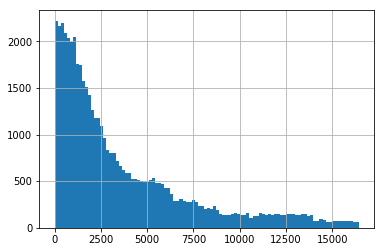

In [22]:
data.Ranking.hist(bins=100)

In [23]:
mean_Rating_by_Ranking = data.groupby(['Ranking','Rating'])['Rating']\
                                    .agg(['mean', 'count'])\
                                    .sort_values(by = 'count', ascending=False)\
                                    .reset_index()
mean_Rating_by_Ranking

,Ranking,Rating,mean,count
0,18.0,4.5,4.5,14
1,80.0,4.5,4.5,14
2,365.0,4.5,4.5,13
3,37.0,4.5,4.5,13
4,13.0,4.5,4.5,13
...,...,...,...,...
30078,899.0,3.5,3.5,1
30079,4172.0,4.0,4.0,1
30080,4171.0,4.0,4.0,1
30081,4170.0,5.0,5.0,1


Text(0, 0.5, 'Ranking')

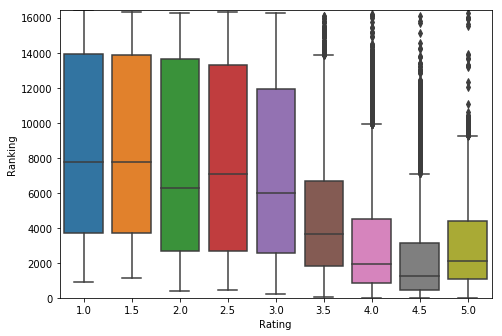

In [24]:

# build boxplot to see the number of cuisines distribution in each rating score
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(data.Ranking.min(),data.Ranking.max())
sns.boxplot(x = data[data['sample']==1]['Rating'], y = data[data['sample']==1]['Ranking'])
# Добавим поясняющие подписи
axes.set_xlabel('Rating')
axes.set_ylabel('Ranking')

the boxplot shows the negative correlatino between Rating and Ranking. High Ranking has lower Rating. Moreover bad Rating has biger Ranking IQR 

In [25]:
#Check the Pearsons correlation
data[data['sample']==1].Ranking.corr(data[data['sample']==1].Rating)

-0.3683714866125338

Indeed there is a negative correlatinb between Rating and Ranking. Check the Number of outliers and clean the data set.Let's see the Ranking distribution by City

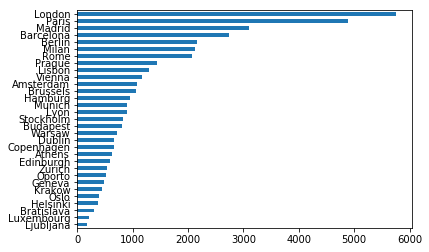

In [26]:
#show City distribution
df_train['City'].value_counts(ascending=True).plot(kind='barh')

as we can see there highert number of restaurants is located in London. Let's check the Ranking distribution in London

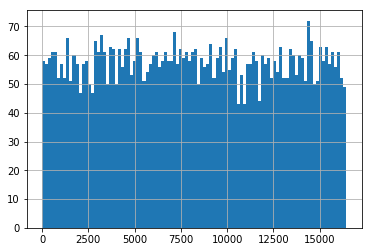

In [27]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

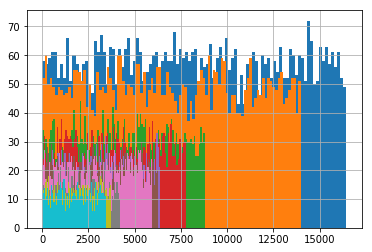

In [28]:
#check rankong distribution for 10 biggest cities
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

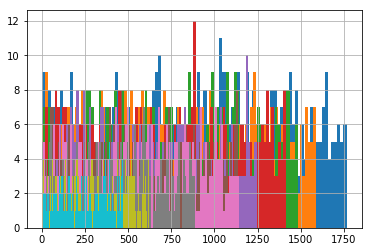

In [29]:

for x in (df_train['City'].value_counts())[-10:].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

it look like the Ranking distribution depends on City size/population. We will created later new feature based on this insights

In [30]:
#Claculate outliers
qntl_25 = data.Ranking.quantile(0.25)
print('perc 25% is:', qntl_25)
qntl_75 = data.Ranking.quantile(0.75)
print('perc 75% is:', qntl_75)
iqr = qntl_75 - qntl_25
print('perc IQR is:', iqr)

out_75plus = qntl_75 + 1.5 * iqr
print('outliers are:', out_75plus, '+')

out_25minus = qntl_25 - 1.5 * iqr
print('outliers are:', out_25minus, '-')


print('outliers makes: ',len(data[data['Ranking']>out_75plus]),' it makes ', \
      len(data[data['Ranking']>out_75plus])/len(data['Ranking']), ' % of the data')

perc 25% is: 972.0
perc 75% is: 5241.0
perc IQR is: 4269.0
outliers are: 11644.5 +
outliers are: -5431.5 -
outliers makes:  3075  it makes  0.0615  % of the data


What about city and cuisine style? Are there correlations between Ranking and these two variables?
Let's check it

## 4. City
### 4.1 City by Ranking

we saw the city distribution want to check the Ranking based on City poppulation

In [31]:
#check  city names orthography, NaN's and number of unique values
print(data.City.unique())
print('number of empty values in City: ', data.City.isnull().sum())
print('number of unique values in City ', len(data.City.unique()))

['Paris' 'Helsinki' 'Edinburgh' 'London' 'Bratislava' 'Lisbon' 'Budapest'
 'Stockholm' 'Rome' 'Milan' 'Munich' 'Hamburg' 'Prague' 'Vienna' 'Dublin'
 'Barcelona' 'Brussels' 'Madrid' 'Oslo' 'Amsterdam' 'Berlin' 'Lyon'
 'Athens' 'Warsaw' 'Oporto' 'Krakow' 'Copenhagen' 'Luxembourg' 'Zurich'
 'Geneva' 'Ljubljana']
number of empty values in City:  0
number of unique values in City  31


In [32]:
#mean Rating by City
city_rating_mean = pd.DataFrame(data.groupby(by='City')['Rating'].agg(['mean']).reset_index())
print('min', round(city_rating_mean['mean'].min(),2), 'and max', round(city_rating_mean['mean'].max(),2))

min 3.03 and max 3.42


range between average rating by city is not big. All cities have the avergae rating by between 3.03 and 3.42
What about average ranking by city? Let's check it:

Text(0, 0.5, 'Rating')

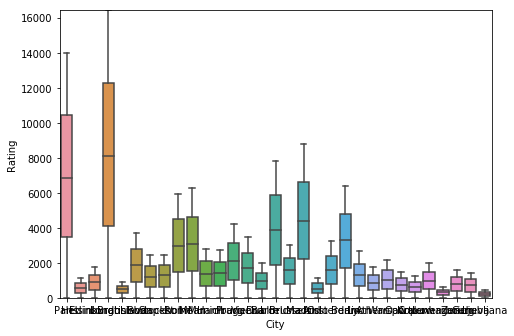

In [33]:
# build look for Ranking distribution in Cities with boxplot 
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(data.Ranking.min(),(data.Ranking.max()+0.5))
sns.boxplot(x = data['City'], y = data['Ranking'])
# Добавим поясняющие подписи
axes.set_xlabel('City')
axes.set_ylabel('Rating')

we can buils cluster based on city and ranking

In [34]:
city_ranking = data.groupby(['City'])['Ranking'].agg(['mean', 'count', 'min', 'max', 'median']).sort_values(by='median', ascending=False).reset_index()
city_ranking

,City,mean,count,min,max,median
0,London,8169.707354,7193,1.0,16444.0,8092.0
1,Paris,6938.557138,6108,3.0,13986.0,6860.5
2,Madrid,4388.516391,3813,1.0,8809.0,4363.0
3,Barcelona,3879.422680,3395,5.0,7796.0,3861.0
4,Berlin,3255.417745,2705,2.0,6372.0,3282.0
5,Milan,3106.027840,2694,1.0,6275.0,3081.5
6,Rome,2970.733102,2589,1.0,5948.0,2972.0
7,Prague,2086.979626,1816,2.0,4188.0,2089.5
8,Lisbon,1867.330298,1647,1.0,3717.0,1901.0
9,Vienna,1711.275814,1443,1.0,3444.0,1701.0


create clusters based on median
- cities with Ranking > 2.000
- cities with ranking between 1.000 - 2.000
- cities with rnaking between 600 - 1.000
- cities with ranking < 600

In [35]:
#function to recode cites
def rec_city_by_rank(row):
    if row['Ranking'] > 2000:
        return 4
    elif (row['Ranking'] > 1000) & (row['Ranking'] < 2001):
        return 3
    elif (row['Ranking'] > 600) & (row['Ranking'] < 1001):
        return 2
    else: return 1  

In [36]:
data['CityByRanking'] = data.apply(rec_city_by_rank, axis=1)

In [37]:
data.CityByRanking.corr(data.Ranking)

0.6286594551898328

### 4.2 City by Country
maybe be there are some interesting dpendencies between cuisine style and country

In [38]:

countries_dict = {'London' : 'England', 'Paris' : 'France', 'Madrid' : 'Spain', 
                  'Barcelona' : 'Spain', 'Berlin' : 'Germany', 'Milan' : 'Italy', 
                  'Rome' : 'Italy', 'Prague' : 'Czech', 'Lisbon' : 'Portugal', 
                  'Vienna' : 'Austria', 'Amsterdam' : 'Holland', 
                  'Brussels' : 'Belgium', 'Hamburg' : 'Germany', 'Munich' : 'Germany', 
                  'Lyon' : 'France', 'Stockholm' : 'Sweden', 'Budapest' : 'Romania', 
                  'Warsaw' : 'Poland', 'Dublin' : 'Ireland', 'Copenhagen' : 'Denmark', 
                  'Athens' : 'Greece', 'Edinburgh' : 'Scotland', 'Zurich' : 'Switzerland', 
                  'Oporto' : 'Portugal', 'Geneva' : 'Switzerland', 'Krakow' : 'Poland', 
                  'Oslo' : 'Norway', 'Helsinki' : 'Finland', 'Bratislava' : 'Slovakia', 
                  'Luxembourg' : 'Luxembourg_country', 'Ljubljana' : 'Slovenia'}
data['Сountry'] = data.apply(lambda row: countries_dict[row['City']], axis = 1)


In [39]:
country = data.groupby(['Сountry', 'City'])['Ranking'].median().reset_index()

### 4.3 City Population

In [40]:

city_pop_dict= {'London' : 9304, 'Paris' : 12278, 'Madrid' : 6618, 'Barcelona' : 5586, 
                        'Berlin' : 3562, 'Milan' : 3140, 'Rome' : 4257, 'Prague' : 1306, 
                        'Lisbon' : 2957, 'Vienna' : 1930, 'Amsterdam' : 1149, 'Brussels' : 208, 
                        'Hamburg' : 1841, 'Munich' : 1538, 'Lyon' : 1719, 'Stockholm' : 1633, 
                        'Budapest' : 1768, 'Warsaw' : 1783, 'Dublin' : 1228, 
                        'Copenhagen' : 794, 'Athens' : 3153, 'Edinburgh' : 537, 
                        'Zurich' : 1395, 'Oporto' : 1313, 'Geneva' : 613, 'Krakow' : 768, 
                        'Oslo' : 697, 'Helsinki' : 1305, 'Bratislava' : 435, 
                        'Luxembourg' : 625, 'Ljubljana' : 284}
data['СityPopulation'] = data.apply(lambda row: city_pop_dict[row['City']], axis = 1)
data

,Restaurant_id,City,CuisineStyle,Ranking,PriceRange,NumberofReviews,Reviews,URL_TA,ID_TA,sample,Rating,CityByRanking,Сountry,СityPopulation
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,4,France,12278
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,1,Finland,1305
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,2,Scotland,537
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,3,England,9304
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,1,Slovakia,435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,1,Italy,3140
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,4,France,12278
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,3,Sweden,1633
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,2,Poland,1783


In [41]:
# correlation between City Population and Ranking
data.Rating.corr(data.СityPopulation)

-0.012919343324262346

In [42]:
#we can create new variable Ranking by City population
data['RankingCityPop'] = data.Ranking / data.СityPopulation


In [43]:
data[data['sample']==1].Rating.corr(data[data['sample']==1].RankingCityPop)

-0.24271159535565556

that means Cities with high population have lightly  lower Ranking

In [44]:
# create new variable based on number of restaurant in the city
data['CityNbRest'] = data['City'].groupby(data['City']).transform('count')

In [45]:
data[data['sample']==1].CityNbRest.corr(data[data['sample']==1].Ranking)

0.7091429600996857

there is a high correlation between Number of Cities and Ranking

In [46]:
#create new feature Ranking by City count
data['RankingCityDist'] = data.Ranking / data.CityNbRest
data[data['sample']==1].RankingCityDist.corr(data[data['sample']==1].Rating)

-0.5437239598501593

### **COMMENTS:**

-created new Variables based on City information:
1. Clustered cities by anking
2. Country - the infomation could be useful for cuisine style analysing like pizza in italy etc. 
3. City population can also have an influence on rating
4. Ranking by city population
5. Number of Restaurant in the City
6. Ranking distribution by numebr of reataurant in the city 

## 5. Numebr of Reviews

In [47]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['NumberofReviews']).astype('uint8')
print('NumberofReviews contains about : ', data.NumberofReviews.isna().sum()/len(data.NumberofReviews), '% of empty values')
print('we can assume that empty for Number of reviews means "no rating" and set it to 0' )
#fillna's with '0' like no Review
data['NumberofReviews'].fillna(0, inplace=True)

NumberofReviews contains about :  0.064 % of empty values
we can assume that empty for Number of reviews means "no rating" and set it to 0


In [48]:
data.columns

Index(['Restaurant_id', 'City', 'CuisineStyle', 'Ranking', 'PriceRange',
       'NumberofReviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating',
       'CityByRanking', 'Сountry', 'СityPopulation', 'RankingCityPop',
       'CityNbRest', 'RankingCityDist', 'Number_of_Reviews_isNAN'],
      dtype='object')

In [49]:
data[data['sample']==1].NumberofReviews.corr(data[data['sample']==1].СityPopulation)

0.022193610364020608

In [50]:
#check the correlation between Number of reviews and Ranking dist by City
data.NumberofReviews.corr(data.RankingCityDist)

-0.4078622789370417

cities with lower population have higher numebr of reviews

### 6. Cuisine Style 

In [51]:
#take a look into CuisineStyle variable
data['CuisineStyle'][:8][:]

0                                       ['Bar', 'Pub']
1    ['European', 'Scandinavian', 'Gluten Free Opti...
2                              ['Vegetarian Friendly']
3    ['Italian', 'Mediterranean', 'European', 'Vege...
4    ['Italian', 'Mediterranean', 'European', 'Seaf...
5                      ['French', 'Cafe', 'Fast Food']
6                           ['European', 'Portuguese']
7                                                  NaN
Name: CuisineStyle, dtype: object

In [52]:
data['CuisineStyle'] = data['CuisineStyle'].fillna("['Else']") #fillna with 'Else'
cuisine_array = data['CuisineStyle'].dropna() 
cuisine_array = cuisine_array.str.slice(1,-1) # remove first and last character in string

#function to remove apostrophe and expty values
def repl(row):
    val = row.replace("'","").replace(" ","") 
    return val

cuisine_array = cuisine_array.apply(lambda x: repl(str(x))) 
cuisine_array = cuisine_array.apply(lambda x: x.split(","))


#create new variable 'cuisine'
data['cuisine'] = cuisine_array
data.head()

,Restaurant_id,City,CuisineStyle,Ranking,PriceRange,NumberofReviews,Reviews,URL_TA,ID_TA,sample,Rating,CityByRanking,Сountry,СityPopulation,RankingCityPop,CityNbRest,RankingCityDist,Number_of_Reviews_isNAN,cuisine
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,4,France,12278,1.055791,6108,2.122299,0,"[Bar, Pub]"
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,1,Finland,1305,0.081226,475,0.223158,0,"[European, Scandinavian, GlutenFreeOptions, Ve..."
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,2,Scotland,537,1.508380,745,1.087248,0,[VegetarianFriendly]
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,3,England,9304,0.179385,7193,0.232031,0,"[Italian, Mediterranean, European, VegetarianF..."
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,1,Slovakia,435,0.085057,380,0.097368,0,"[Italian, Mediterranean, European, Seafood, Ve..."


In [53]:
#count single values in array
c = collections.Counter()
for i in data.index:
    for category in cuisine_array[i]:
        c[category] += 1
print(c)

Counter({'VegetarianFriendly': 14021, 'European': 12561, 'Else': 11590, 'Mediterranean': 7820, 'Italian': 7433, 'VeganOptions': 5684, 'GlutenFreeOptions': 5185, 'Bar': 4094, 'French': 3970, 'Asian': 3786, 'Pizza': 3502, 'Spanish': 3456, 'Pub': 3058, 'Cafe': 2883, 'FastFood': 2122, 'British': 1992, 'International': 1966, 'Seafood': 1878, 'Japanese': 1860, 'CentralEuropean': 1727, 'American': 1642, 'Sushi': 1450, 'Chinese': 1446, 'Portuguese': 1385, 'Indian': 1328, 'MiddleEastern': 980, 'Thai': 923, 'WineBar': 877, 'German': 820, 'Halal': 773, 'Greek': 768, 'Healthy': 758, 'Fusion': 748, 'Czech': 745, 'Steakhouse': 729, 'Barbecue': 710, 'Contemporary': 652, 'Soups': 630, 'EasternEuropean': 629, 'Vietnamese': 622, 'Grill': 617, 'Gastropub': 608, 'Turkish': 574, 'Mexican': 572, 'SouthAmerican': 490, 'Delicatessen': 473, 'Austrian': 462, 'Polish': 453, 'Scandinavian': 449, 'Hungarian': 444, 'Lebanese': 397, 'Diner': 375, 'Latin': 373, 'Dutch': 368, 'Irish': 352, 'StreetFood': 336, 'Belgian'

In [54]:
#mean number of cuisins in one restaurant
mean_cus_lsit = []

for i in data.index:

    nb = len(cuisine_array[i])
    mean_cus_lsit.append(nb)
    
print(np.mean(mean_cus_lsit))

2.62532


In [55]:
#creste new column with number of cuisine in restarant
data['cuisine_nb'] = mean_cus_lsit
data.head()

,Restaurant_id,City,CuisineStyle,Ranking,PriceRange,NumberofReviews,Reviews,URL_TA,ID_TA,sample,Rating,CityByRanking,Сountry,СityPopulation,RankingCityPop,CityNbRest,RankingCityDist,Number_of_Reviews_isNAN,cuisine,cuisine_nb
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,4,France,12278,1.055791,6108,2.122299,0,"[Bar, Pub]",2
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,1,Finland,1305,0.081226,475,0.223158,0,"[European, Scandinavian, GlutenFreeOptions, Ve...",5
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,2,Scotland,537,1.508380,745,1.087248,0,[VegetarianFriendly],1
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,3,England,9304,0.179385,7193,0.232031,0,"[Italian, Mediterranean, European, VegetarianF...",5
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,1,Slovakia,435,0.085057,380,0.097368,0,"[Italian, Mediterranean, European, Seafood, Ve...",6


Text(0, 0.5, 'cuisine_nb')

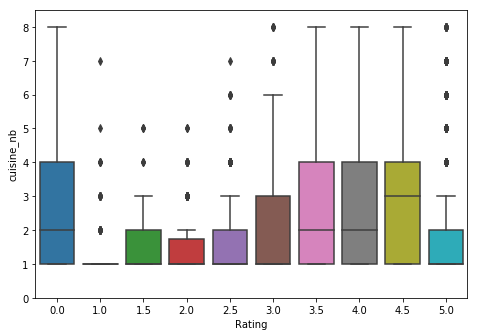

In [56]:
# build boxplot to see the number of cuisines distribution in each rating score
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0,8.5)
sns.boxplot(x = data['Rating'], y = data['cuisine_nb'])
# Добавим поясняющие подписи
axes.set_xlabel('Rating')
axes.set_ylabel('cuisine_nb')

In [57]:
data[data['sample']==1].cuisine_nb.corr(data[data['sample']==1].Rating)

0.12005927610873016

you can see on the boxplot, that there are some differences between rating score and number of cuisins. Restaurants with high rating have in average higher number of cuisins. You can consider that in median and IQR.

As next step we will build new dummy variables and cluster cuisines into groups 

In [58]:

######################
healthy = []

for cuisine in cuisine_array:
    if len(set(cuisine) & set(list(['VegetarianFriendly', 'GlutenFreeOptions', 'Healthy', 'VeganOptions']))) !=0:
           healthy.append(1)
    else: healthy.append(0)

data['healthy'] = healthy 


#######################
taboo = []

for cuisine in cuisine_array:
    if len(set(cuisine) & set(list(['Halal', 'Kosher']))) !=0:
           taboo.append(1)
    else: taboo.append(0)

data['taboo'] = taboo 

#########                                    
seafood = []

for cuisine in cuisine_array:
    if len(set(cuisine) & set(list(['Seafood']))) !=0:
           seafood.append(1)
    else: seafood.append(0)

data['seafood'] = seafood

###########
alco = []

for cuisine in cuisine_array:
    if len(set(cuisine) & set(list(['Bar', 'Pub', 'WineBar', 'Gastropub', 'BrewPub']))) !=0:
           alco.append(1)
    else: alco.append(0)

data['alco'] = alco

############

fast = []

for cuisine in cuisine_array:
    if len(set(cuisine) & set(list(['Cafe', 'FastFood', 'Diner', 'StreetFood']))) !=0:
           fast.append(1)
    else: fast.append(0)

data['fast'] = fast

 #############
    
other = []

for cuisine in cuisine_array:
    if len(set(cuisine) & set(list(['International', 'Fusion', 'Contemporary', 'Delicatessen']))) !=0:
           other.append(1)
    else: other.append(0)

data['other'] = other

#############
italian = []

for cuisine in cuisine_array:
    if len(set(cuisine) & set(list(['Italian', 'Pizza']))) !=0:
           italian.append(1)
    else: italian.append(0)

data['italian'] = italian

####################
european = []

for cuisine in cuisine_array:
    if len(set(cuisine) & set(list(['European', 'Mediterranean', 'Italian', 'French', 'Spanish', 'British', 'CentralEuropean', 'Portuguese',\
           'German', 'Greek', 'Czech', 'EasternEuropean', 'Austrian', 'Polish', 'Scandinavian', 'Hungarian',\
           'Dutch', 'Irish', 'Belgian', 'Danish', 'Swiss', 'Swedish', 'Scottish', 'Norwegian']))) !=0:
           european.append(1)
    else: european.append(0)

data['european'] = european

##############

asian = []

for cuisine in cuisine_array:
    if len(set(cuisine) & set(list(['Asian', 'Japanese', 'Sushi', 'Chinese', 'Indian',  'Thai', 'Vietnamese', 'Korean', 'Pakistani', 'Nepali'\
         , 'Balti', 'Bangladeshi', 'Indonesian', 'Malaysian', 'Sri Lankan', 'Taiwanese', 'Tibetan',\
         'Cambodian', 'Singaporean', 'Mongolian', 'Filipino', 'Minority Chinese', 'Central Asian', 'Yunnan', \
         'Xinjiang']))) !=0:
           asian.append(1)
    else: asian.append(0)

data['asian'] = asian

###########
    
steak = []

for cuisine in cuisine_array:
    if len(set(cuisine) & set(list(['Steakhouse', 'Barbecue', 'Grill']))) !=0:
           steak.append(1)
    else: steak.append(0)

data['steak'] = steak   
    
############

eastern = []

for cuisine in cuisine_array:
    if len(set(cuisine) & set(list(['MiddleEastern', 'Turkish', 'Lebanese', 'Israeli', 'Persian', 'Arabic', 'Afghani', 'Uzbek']))) !=0:
           eastern.append(1)
    else: eastern.append(0)

data['eastern'] = eastern  

#############

african = []

for cuisine in cuisine_array:
    if len(set(cuisine) & set(list(['African', 'Moroccan', 'Ethiopian', 'Egyptian', 'Tunisian']))) !=0:
           african.append(1)
    else: african.append(0)

data['african'] = african  

###############


australian = []

for cuisine in cuisine_array:
    if len(set(cuisine) & set(list(['Australian', 'New Zealand']))) !=0:
           australian.append(1)
    else: australian.append(0)

data['australian'] = australian  

###############

american = []

for cuisine in cuisine_array:
    if len(set(cuisine) & set(list(['American', 'Canadian']))) !=0:
           american.append(1)
    else: american.append(0)

data['american'] = american  

###############


latamerican = []

for cuisine in cuisine_array:
    if len(set(cuisine) & set(list(['Mexican', 'South American', 'Latin', 'Argentinean', 'CentralAmerican', 'Brazilian', 'Peruvian',\
               'Venezuelan', 'Jamaican', 'Cuban', 'Colombian', 'Cajun & Creole', 'Southwestern',\
               'Chilean', 'Ecuadorean', 'NativeAmerican', 'Salvadoran']))) !=0:
           latamerican.append(1)
    else: latamerican.append(0)

data['latamerican'] = latamerican  

###############


exotic = []

for cuisine in cuisine_array:
    if len(set(cuisine) & set(list(['Hawaiian', 'Polynesian', 'Jamaican', 'Cuban', 'Fujian', 'Burmese', 'Caribbean']))) !=0:
           exotic.append(1)
    else: exotic.append(0)

data['exotic'] = exotic  

###############


сaucas = []

for cuisine in cuisine_array:
    if len(set(cuisine) & set(list(['Georgian', 'Armenian', 'Caucasian', 'Azerbaijani']))) !=0:
           сaucas.append(1)
    else: сaucas.append(0)

data['сaucas'] = сaucas  

###############


    

### Comments
- at the beginning we cleaned the cuisine style variable, removes ', ' '. 
- created an array with unoque number of cuisine and counted the
- we created come new variables, like cuisine count per restaurant and cuisne grous 


## 7. Price Range

In [59]:
#check null entries in "PriceRange"
print('Number of non empty entries in PriceRange is', len(data)-data.PriceRange.isnull().sum())
print('it makes', round(data.PriceRange.isnull().sum()/len(data)*100,2), '%')
print('unique values ',data.PriceRange.unique())

Number of non empty entries in PriceRange is 32639
it makes 34.72 %
unique values  ['$$ - $$$' '$$$$' '$' nan]


In [60]:
data['PriceRange'] = data['PriceRange'].fillna(0)

In [61]:
#function to recode price segment
def recode_price(row):
    if row['PriceRange'] == '$':
        return 1
    elif row['PriceRange'] == '$$ - $$$':
        return 2
    elif row['PriceRange'] == '$$$$':
        return 3
    else: return 0

In [62]:
#apply recode function to price range column and create new price column which we will recode to dummy variable
data['PriceCat'] = data.apply(recode_price, axis = 1)
data.groupby(['PriceRange', 'PriceCat'])['PriceRange'].count()


PriceRange  PriceCat
0           0           17361
$           1            7816
$$ - $$$    2           23041
$$$$        3            1782
Name: PriceRange, dtype: int64

### 8. Reviews
### 8.1 Review content

In [63]:
review_array = data['Reviews']
review_array = review_array.str.slice(1,-1)
def repl(row):
    val = row.replace("' ","")\
             .replace('[', '')\
             .replace(']', '')\
             .replace(',', '')\
             .replace('.', '')\
             .replace('?', '')\
             .replace('!', '')\
             .replace(" ", "' '")\
             .replace('"', '')\
             .lower()
    return val

review_array = review_array.apply(lambda x: repl(str(x))) 
review_array = review_array.apply(lambda x: x.split(" "))



review_array[1:]

1        ['very', 'good', 'reviews'', ''fine', 'dining'...
2        ['better', 'than', 'the', 'links'', ''ivy', 'b...
3        ['most', 'exquisite'', ''delicious', 'and', 'a...
4        ['always', 'the', 'best', 'in', 'bratislava'',...
5        ['lunch', 'break'', ''good', 'to', 'quick', 'b...
                               ...                        
49995    ['the', 'real', 'italian', 'experience'', ''wo...
49996    ['parisian', 'atmosphere'', ''bit', 'pricey', ...
49997    ['good', 'by', 'swedish', 'standards'', ''a', ...
49998    ['underground', 'restaurant'', ''oldest', 'res...
49999    ['average'', ''nice', 'an', 'informal'', ''01/...
Name: Reviews, Length: 49999, dtype: object

In [64]:
data['positive_review'] = data.Reviews.str.contains('excited|ecstatic|honest|to be pleased|serious\
                                                    |joyful|pleasant|friendly|glad|fair|happy|good\
                                                    |interested|concentrated|brave|nice|curious|optimistic\
                                                    |fantastic|quiet|clever|great|blissful|surprised|innocent\
                                                    |love|lovestruck|mediative|sensible|careful|cautious\
                                                    |wonderful|satisfied|confident|tasty\
                                                    |agreeable|blessed|congenial|darling|delectable|delicious|delightful|enjoyable|good|grateful\
                                                    |heavenly|pleasant|pleasurable|pretty').fillna(0).astype(int)


data['negative_review'] = data.Reviews.str.contains('aggressive|disgusted|arrogant|grieving|upset\
                                                    |stupid|mischievous|silly|smug|lonely|miserable\
                                                    |horrified|disappointed|exhausted|enraged|frustrated\
                                                    |bored|nasty|agonized|shocked|indifferent|helpless\
                                                    |hysterical|idiotic|confused|lovesick|suspicious|nervous\
                                                    |bad|terrible|awful|guilty|strange|sad|sorry|disbelieving\
                                                    |frightened|annoyed|puzzled|hangover|sheepish|hurt|crazy\
                                                    |mad|angry').fillna(0).astype(int)


def netr_func(row):
    if (row['negative_review'] + row['positive_review']) == 0 | (row['negative_review'] + row['positive_review']) == 2:
        val = 1
    else: val = 0
    return val
data['neutral_review'] = data.apply(netr_func, axis=1)


### COMMENTS
- we created three new features with positive, negative and neutral (not postove and not negative or both)
- as next step we will analye the date between reviews 



In [65]:
#drop all columns which we do not need for modeling 
data_for_model = data.drop(['Restaurant_id', 'Number_of_Reviews_isNAN','City', 'CuisineStyle','PriceRange','Reviews', 'URL_TA', 'ID_TA','cuisine','Сountry'], axis = 1)
data_for_model.head(2)

,Ranking,NumberofReviews,sample,Rating,CityByRanking,СityPopulation,RankingCityPop,CityNbRest,RankingCityDist,cuisine_nb,...,african,australian,american,latamerican,exotic,сaucas,PriceCat,positive_review,negative_review,neutral_review
0,12963.0,4.0,0,0.0,4,12278,1.055791,6108,2.122299,2,...,0,0,0,0,0,0,2,0,0,0
1,106.0,97.0,0,0.0,1,1305,0.081226,475,0.223158,5,...,0,0,0,0,0,0,2,1,0,0


In [66]:
def StandardScaler_column(d_col):
    scaler = StandardScaler()
    scaler.fit(data_for_model[[d_col]])
    return scaler.transform(data_for_model[[d_col]])
# стандартизируем все столбцы кроме целевой и Sample
for i  in list(data_for_model.columns):
    if i not in ['Rating','sample']:
        data_for_model[i] = StandardScaler_column(i)
        if len(data_for_model[data_for_model[i].isna()]) < len(data_for_model):
            data_for_model[i] = data_for_model[i].fillna(0)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

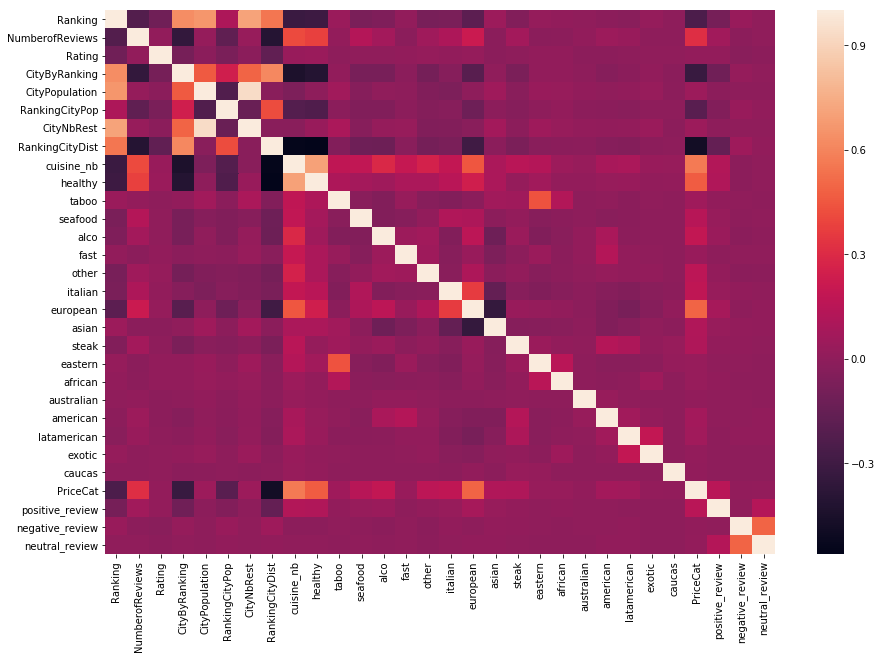

In [67]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data_for_model.drop(['sample'], axis=1).corr(),)

In [68]:
#the run befor showed that another features do not bring much input for model building
data_for_model = data[['RankingCityDist', 'NumberofReviews', 'Rating', 'Ranking', 'СityPopulation', 'RankingCityPop',
                'CityNbRest', 'cuisine_nb', 'PriceCat', 'european', 'positive_review', 'sample']]
data_for_model

,RankingCityDist,NumberofReviews,Rating,Ranking,СityPopulation,RankingCityPop,CityNbRest,cuisine_nb,PriceCat,european,positive_review,sample
0,2.122299,4.0,0.0,12963.0,12278,1.055791,6108,2,2,0,0,0
1,0.223158,97.0,0.0,106.0,1305,0.081226,475,5,2,1,1,0
2,1.087248,28.0,0.0,810.0,537,1.508380,745,1,2,0,0,0
3,0.232031,202.0,0.0,1669.0,9304,0.179385,7193,5,3,1,0,0
4,0.097368,162.0,0.0,37.0,435,0.085057,380,6,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.185598,79.0,4.5,500.0,3140,0.159236,2694,4,2,1,1,1
49996,1.038147,542.0,3.5,6341.0,12278,0.516452,6108,5,2,1,1,1
49997,1.599226,4.0,4.5,1652.0,1633,1.011635,1033,2,0,0,0,1
49998,0.692973,70.0,4.0,641.0,1783,0.359506,925,5,2,1,0,1


# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [69]:
# Теперь выделим тестовую часть
#train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
#test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

train_data = data_for_model.query('sample == 1').drop(['sample'], axis=1)
test_data = data_for_model.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

In [70]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [71]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 11), (40000, 11), (40000, 10), (32000, 10), (8000, 10))

# Model 
Сам ML

In [72]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [73]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [74]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [75]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.210928125


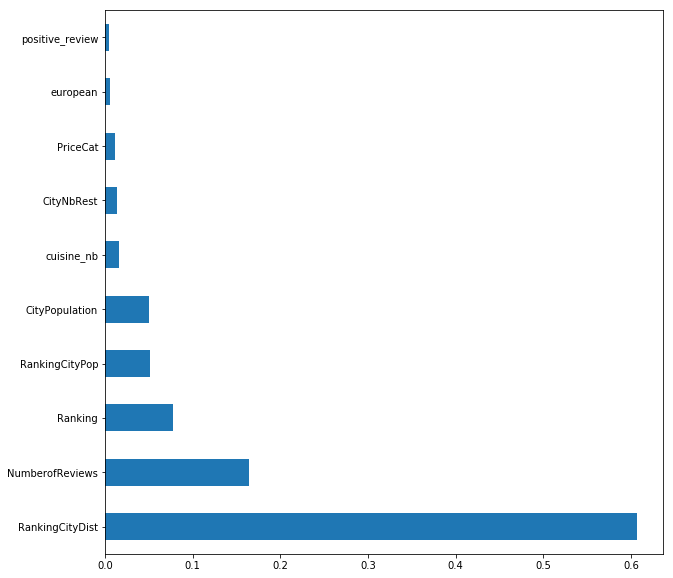

In [76]:
## в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

## SUMMARY
- we analysed the data and removed NA's where neeede.
- created new feature like:


1. we clustered Cities by Ranking. There are some dependencies between City and Ranking
2. created new variables based on City population
3. clustered the information of cuisine style like helathy food, italian, asian etc. to reduce number of cuines. At leased we created dummy variables based on this information
4. recoded Price Range into PriceCat as ordinal variable and puted Na's to 0, like no price range. As we can compare tha numers in Price Category like  3 is higher that 2 we don't need to build dummies based on Prioce Range
5. Build some list with positive and negative words, searched for this wird in Review and created new features like positive, negative and neutral reviews


# Submission
Если все устраевает - готовим Submission на кагл

In [77]:
test_data.sample(10)

,RankingCityDist,NumberofReviews,Rating,Ranking,СityPopulation,RankingCityPop,CityNbRest,cuisine_nb,PriceCat,european,positive_review
868,2.287671,0.0,0.0,3006.0,208,14.451923,1314,1,0,0,0
7371,1.808287,5.0,0.0,6895.0,6618,1.041856,3813,1,0,0,0
8066,2.305009,0.0,0.0,8789.0,6618,1.328045,3813,1,0,0,0
6262,1.052865,6.0,0.0,2848.0,3562,0.799551,2705,3,0,0,0
4169,0.494597,113.0,0.0,3021.0,12278,0.246050,6108,2,2,1,0
643,1.740088,6.0,0.0,3160.0,1306,2.419602,1816,3,0,1,0
9672,0.607165,48.0,0.0,1000.0,2957,0.338181,1647,3,2,1,0
9369,2.195564,0.0,0.0,5939.0,3562,1.667322,2705,1,0,0,0
1558,1.039293,41.0,0.0,6348.0,12278,0.517022,6108,1,2,0,0
2061,0.384912,90.0,0.0,699.0,1306,0.535222,1816,6,2,0,0


In [78]:
test_data = test_data.drop(['Rating'], axis=1)

In [79]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [80]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [81]:
predict_submission

array([3.04 , 4.235, 4.385, ..., 3.04 , 4.5  , 4.225])

In [82]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [83]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.040
1,id_1,4.235
2,id_2,4.385
3,id_3,4.270
4,id_4,4.410
5,id_5,4.665
6,id_6,2.750
7,id_7,2.135
8,id_8,4.090
9,id_9,4.715


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
